In [1]:
#Importing all necessary libraries here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score , train_test_split , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import classification_report
from scipy import stats

In [31]:
#Importing Dataset
data = pd.read_csv('https://raw.githubusercontent.com/OmkarKatkade/NLP-data/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Checking for null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Getting description of the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# EDA and Outlier Detection

**For the attribute 'Pregnancies'**

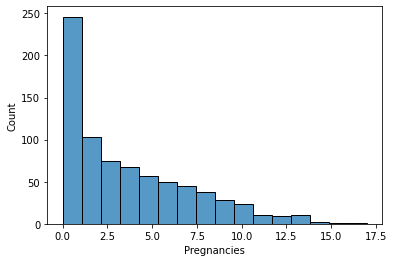

In [36]:
sns.histplot(x=data['Pregnancies'])
plt.show()

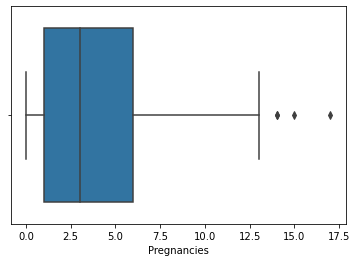

In [35]:
sns.boxplot(x=data['Pregnancies'])
plt.show()

In [38]:
data[data['Pregnancies'] > 13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


In [10]:
data.loc[data['Pregnancies'] > 13 , 'Pregnancies'] = np.nan

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


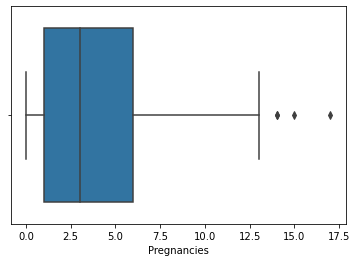

In [6]:
sns.boxplot(x=data['Pregnancies'])
plt.show()

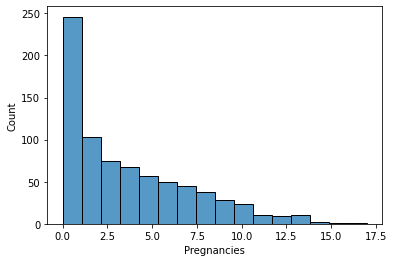

In [7]:
sns.histplot(x=data['Pregnancies'])
plt.show()

In [13]:
data['Pregnancies'].isnull().sum()

4

**For the attribute 'Glucose'**

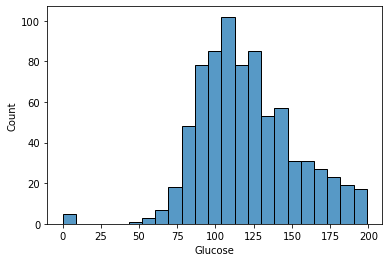

In [8]:
sns.histplot(data['Glucose'])
plt.show()

In [15]:
data.loc[data['Glucose'] < 50 , 'Glucose']

62     44
75      0
182     0
342     0
349     0
502     0
Name: Glucose, dtype: int64

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


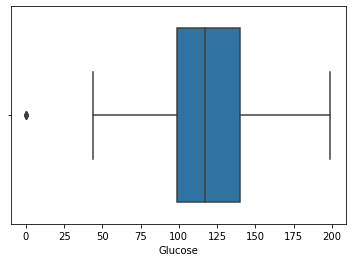

In [9]:
sns.boxplot(x=data['Glucose'])
plt.show()

In [17]:
data.loc[data['Glucose'] < 40 , 'Glucose'] = np.nan

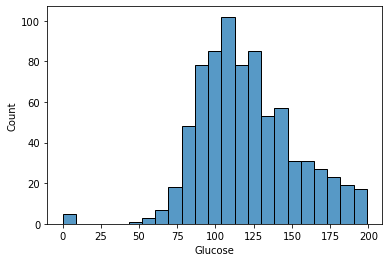

In [10]:
sns.histplot(data['Glucose'])
plt.show()

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


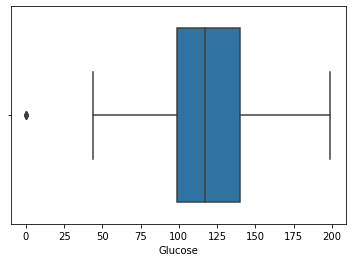

In [11]:
sns.boxplot(x=data['Glucose'])
plt.show()

**For the attribute 'BloodPressure'**

<AxesSubplot:xlabel='BloodPressure', ylabel='Count'>

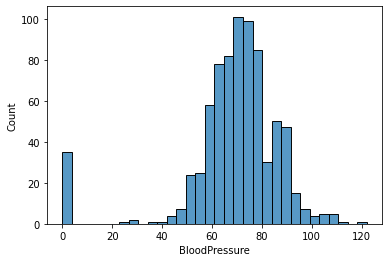

In [20]:
sns.histplot(data['BloodPressure'])
plt.show()

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


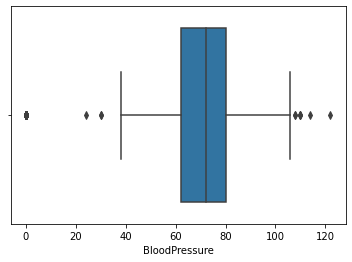

In [13]:
sns.boxplot(data['BloodPressure'])
plt.show()

In [22]:
data.loc[data['BloodPressure'] < 40 , 'BloodPressure'] = np.nan

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


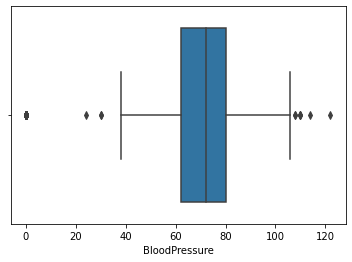

In [14]:
sns.boxplot(x=data['BloodPressure'])
plt.show()

In [24]:
data.loc[data['BloodPressure'] > 120]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1.0,96.0,122.0,0,0,22.4,0.207,27,0


In [25]:
data.loc[data['BloodPressure'] > 120 , 'BloodPressure'] = np.nan

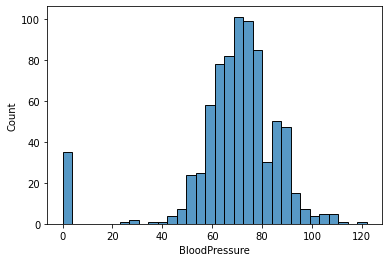

In [15]:
sns.histplot(x=data['BloodPressure'])
plt.show()

**For the attribute 'SkinThickness'**

<AxesSubplot:xlabel='SkinThickness', ylabel='Count'>

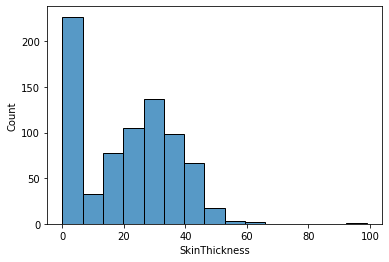

In [27]:
sns.histplot(data['SkinThickness'])
plt.show()

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


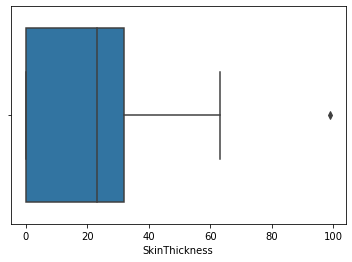

In [16]:
sns.boxplot(x=data['SkinThickness'])
plt.show()

In [29]:
data.loc[data['SkinThickness'] < 12 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8.0,183.0,64.0,0,0,23.3,0.672,32,1
5,5.0,116.0,74.0,0,0,25.6,0.201,30,0
7,10.0,115.0,NaN,0,0,35.3,0.134,29,0
9,8.0,125.0,96.0,0,0,0.0,0.232,54,1
10,4.0,110.0,92.0,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0.0,123.0,72.0,0,0,36.3,0.258,52,1
758,1.0,106.0,76.0,0,0,37.5,0.197,26,0
759,6.0,190.0,92.0,0,0,35.5,0.278,66,1
762,9.0,89.0,62.0,0,0,22.5,0.142,33,0


In [30]:
data.loc[data['SkinThickness'] <12  , 'SkinThickness'] = np.nan

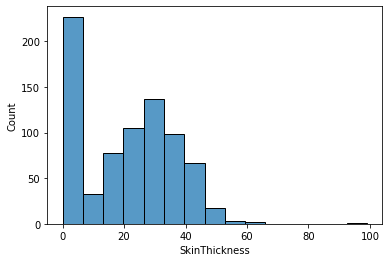

In [17]:
sns.histplot(data['SkinThickness'])
plt.show()

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


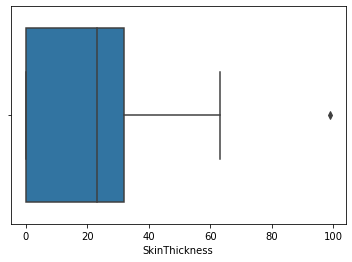

In [18]:
sns.boxplot(x=data['SkinThickness'])
plt.show()

In [33]:
data.loc[data['SkinThickness'] > 59 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0.0,100.0,88.0,60.0,110,46.8,0.962,31,0
445,0.0,180.0,78.0,63.0,14,59.4,2.420,25,1
579,2.0,197.0,70.0,99.0,0,34.7,0.575,62,1


**Insulin**

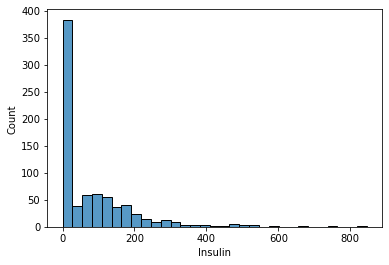

In [19]:
sns.histplot(data['Insulin'])
plt.show()

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


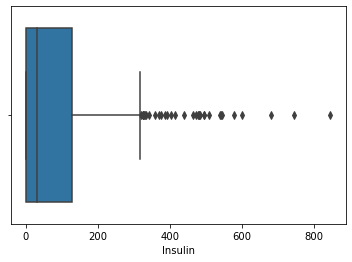

In [20]:
sns.boxplot(x=data['Insulin'])
plt.show()

In [36]:
data.loc[data['Insulin'] == 0 ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,0,23.3,0.672,32,1
5,5.0,116.0,74.0,NaN,0,25.6,0.201,30,0
7,10.0,115.0,NaN,NaN,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,0,44.0,0.403,43,1
762,9.0,89.0,62.0,NaN,0,22.5,0.142,33,0
764,2.0,122.0,70.0,27.0,0,36.8,0.340,27,0
766,1.0,126.0,60.0,NaN,0,30.1,0.349,47,1


In [37]:
data.loc[data['Insulin'] == 0 , 'Insulin'] = np.nan

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


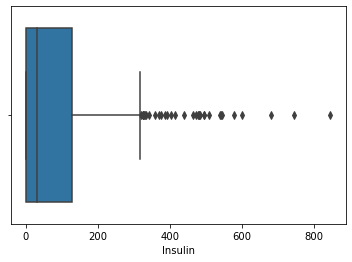

In [21]:
sns.boxplot(x=data['Insulin'])
plt.show()

In [39]:
data.loc[data['Insulin'] > 500]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59,1
228,4.0,197.0,70.0,39.0,744.0,36.7,2.329,31,0
247,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23,0
286,5.0,155.0,84.0,44.0,545.0,38.7,0.619,34,0
409,1.0,172.0,68.0,49.0,579.0,42.4,0.702,28,1
584,8.0,124.0,76.0,24.0,600.0,28.7,0.687,52,1
655,2.0,155.0,52.0,27.0,540.0,38.7,0.240,25,1
753,0.0,181.0,88.0,44.0,510.0,43.3,0.222,26,1


In [40]:
data.loc[data['Insulin'] > 500 , 'Insulin'] = np.nan

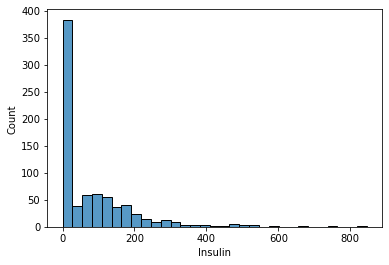

In [22]:
sns.histplot(data['Insulin'])
plt.show()

**For the attribute 'BMI'**

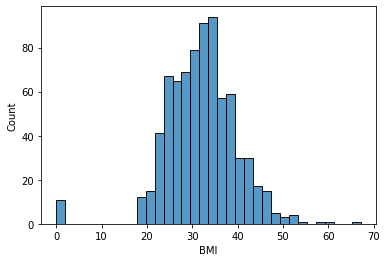

In [23]:
sns.histplot(data['BMI'])
plt.show()

In [43]:
data.loc[data['BMI'] == 0 , 'BMI'] = np.nan

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


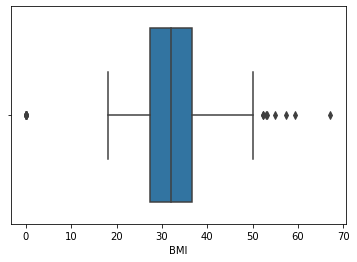

In [24]:
sns.boxplot(x=data['BMI'])
plt.show()

In [45]:
data.loc[data['BMI'] > 60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0.0,129.0,110.0,46.0,130.0,67.1,0.319,26,1


**For the attribute 'DiabetesPedigreeFunction'**

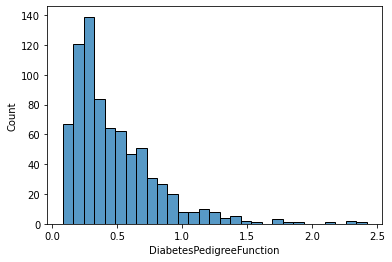

In [25]:
sns.histplot(data['DiabetesPedigreeFunction'])
plt.show()

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


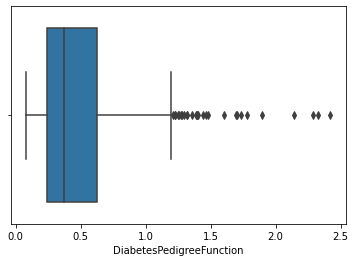

In [26]:
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.show()

**For the attribute 'Age'**

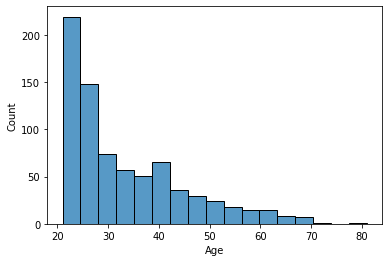

In [27]:
sns.histplot(data['Age'])
plt.show()

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


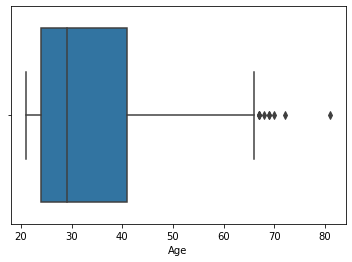

In [28]:
sns.boxplot(x=data['Age'])
plt.show()

**Outcome**

C:\Users\omkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


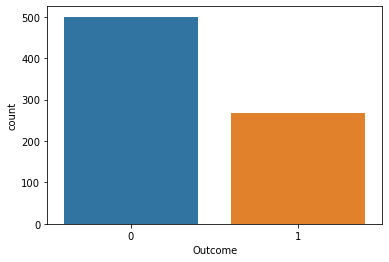

In [29]:
sns.countplot(x=data['Outcome'])
plt.show()

# Correlation

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


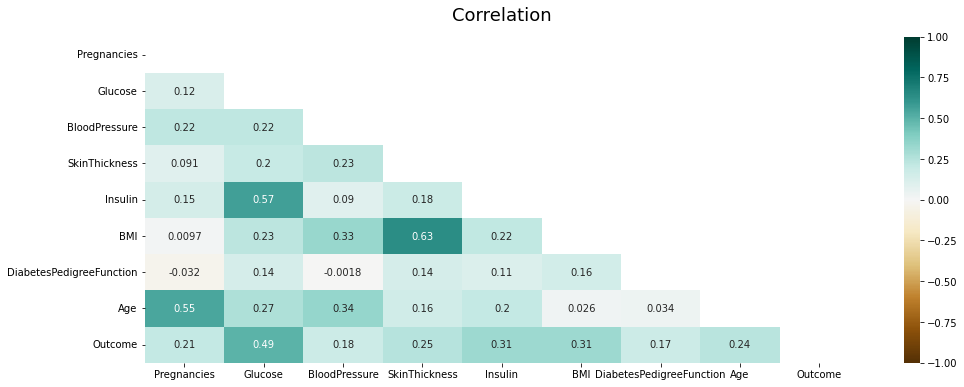

In [51]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16);